In [ ]:
# Import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Load dataset
df = pd.read_csv("/content/House_price_prediction_dataset.csv")
display(df.head())

,ID,Property_Name,Price,House_Type,Area_in_sq_ft,No_of_Bedrooms,No_of_Bathrooms,No_of_Receptions,Location,City_County,Postal_Code
0,0,'Queens Road',1675000,House,2716,5,5,5,Wimbledon,London,'SW19 8NY'
1,1,'Seward Street',650000,'Flat / Apartment',814,2,2,2,Clerkenwell,London,'EC1V 3PA'
2,2,'Hotham Road',735000,'Flat / Apartment',761,2,2,2,Putney,London,'SW15 1QL'
3,3,'Festing Road',1765000,House,1986,4,4,4,Putney,London,'SW15 1LP'
4,4,'Spencer Walk',675000,'Flat / Apartment',700,2,2,2,Putney,London,'SW15 1PL'


In [ ]:
# View last 5 Rows
df.tail()

,ID,Property_Name,Price,House_Type,Area_in_sq_ft,No_of_Bedrooms,No_of_Bathrooms,No_of_Receptions,Location,City_County,Postal_Code
3468,3475,'One Lillie Square',3350000,'New development',1410,3,3,3,?,'Lillie Square','SW6 1UE'
3469,3476,'St. James\'s Street',5275000,'Flat / Apartment',1749,3,3,3,'St James\'s',London,'SW1A 1JT'
3470,3477,'Ingram Avenue',5995000,House,4435,6,6,6,'Hampstead Garden Suburb',London,'NW11 6TG'
3471,3478,'Cork Street',6300000,'New development',1506,3,3,3,Mayfair,London,'W1S 3AR'
3472,3479,'Courtenay Avenue',8650000,House,5395,6,6,6,Highgate,London,'N6 4LP'


In [ ]:
# Drop Un-necessary column
df.drop("ID", inplace=True,axis=1)

In [ ]:
# Check shape of dataset
print("Number of Rows:", df.shape[0])
print("Number of Columns:", df.shape[1])

Number of Rows: 3473
Number of Columns: 10


In [ ]:
# Check for NULL values
df.isnull().sum()

,0
Property_Name,0
Price,0
House_Type,0
Area_in_sq_ft,0
No_of_Bedrooms,0
No_of_Bathrooms,0
No_of_Receptions,0
Location,0
City_County,0
Postal_Code,0


In [ ]:
# Check data description
df.describe()

,Price,Area_in_sq_ft,No_of_Bedrooms,No_of_Bathrooms,No_of_Receptions
count,3.473000e+03,3473.000000,3473.000000,3473.000000,3473.000000
mean,1.865015e+06,1713.383242,3.104809,3.104809,3.104809
std,2.269110e+06,1365.050367,1.518117,1.518117,1.518117
min,1.800000e+05,274.000000,0.000000,0.000000,0.000000
25%,7.500000e+05,834.000000,2.000000,2.000000,2.000000
50%,1.225000e+06,1310.000000,3.000000,3.000000,3.000000
75%,2.150000e+06,2157.000000,4.000000,4.000000,4.000000
max,3.975000e+07,15405.000000,10.000000,10.000000,10.000000


In [ ]:
# Set style
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

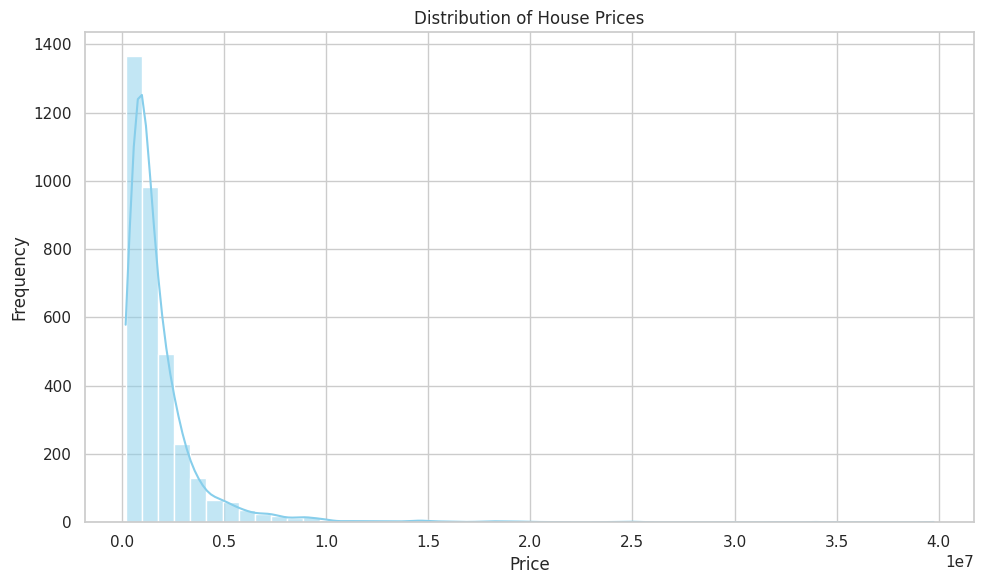

In [ ]:
# Plot 1: Distribution of House Prices
plt.figure()
sns.histplot(df['Price'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of House Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

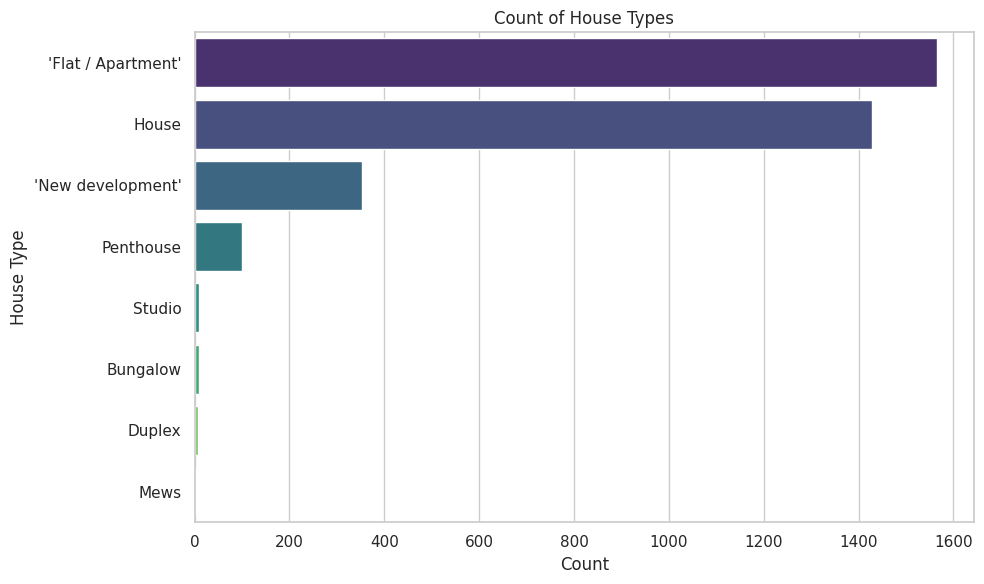

In [ ]:
# Plot 2: Count of House Types
plt.figure()
sns.countplot(data=df, y='House_Type', order=df['House_Type'].value_counts().index, palette='viridis')
plt.title('Count of House Types')
plt.xlabel('Count')
plt.ylabel('House Type')
plt.tight_layout()
plt.show()

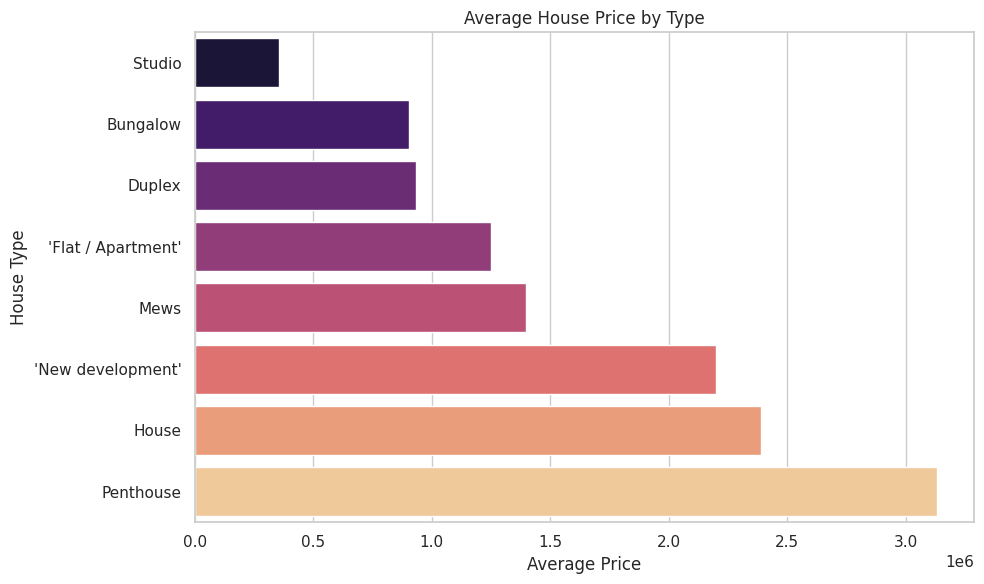

In [ ]:
# Plot 3: Average Price by House Type
plt.figure()
avg_price = df.groupby('House_Type')['Price'].mean().sort_values()
sns.barplot(x=avg_price.values, y=avg_price.index, palette='magma')
plt.title('Average House Price by Type')
plt.xlabel('Average Price')
plt.ylabel('House Type')
plt.tight_layout()
plt.show()

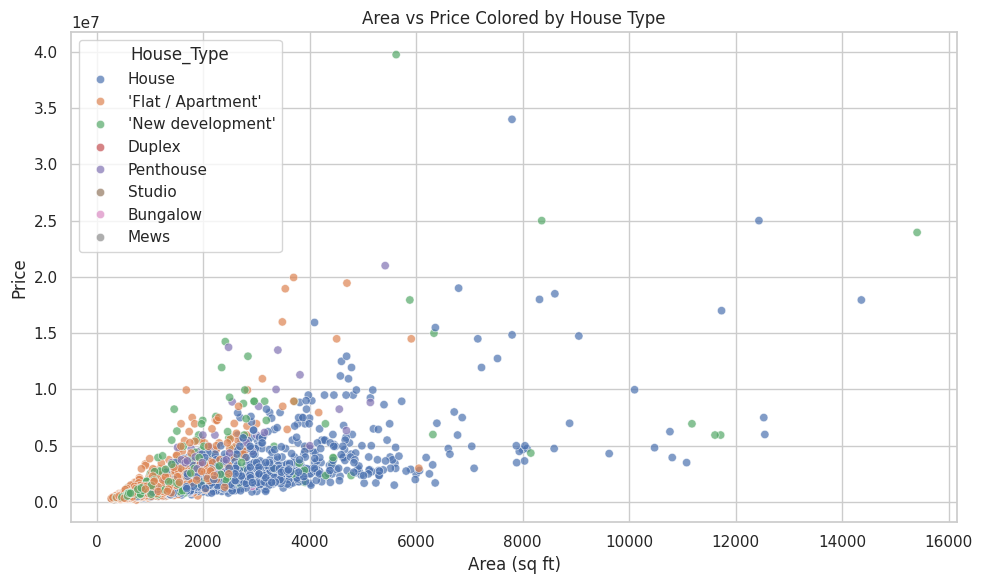

In [ ]:
# Plot 4: Scatter Plot - Area vs Price
plt.figure()
sns.scatterplot(data=df, x='Area_in_sq_ft', y='Price', hue='House_Type', alpha=0.7)
plt.title('Area vs Price Colored by House Type')
plt.xlabel('Area (sq ft)')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

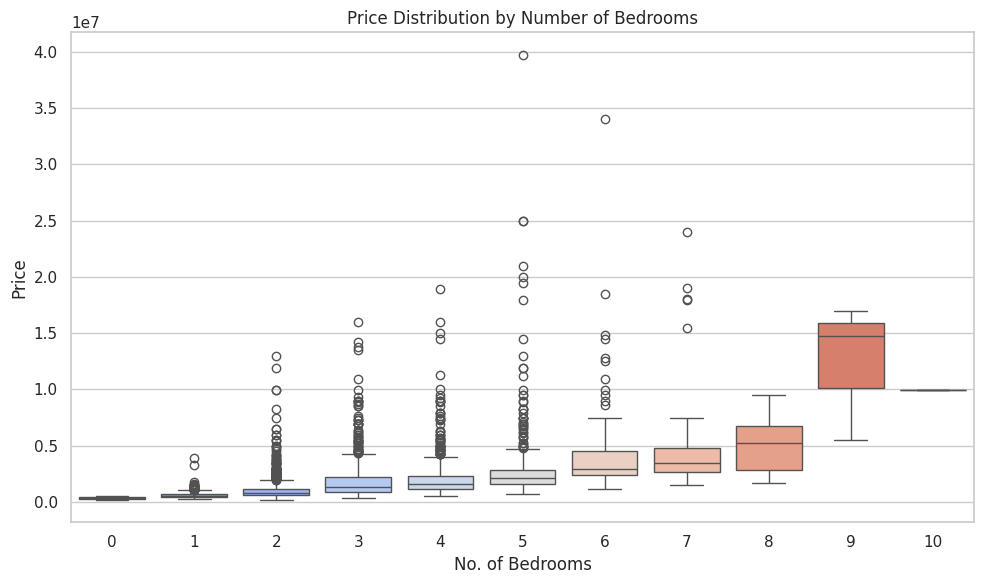

In [ ]:
# Plot 5: Bedrooms vs Price (Box Plot)
plt.figure()
sns.boxplot(data=df, x='No_of_Bedrooms', y='Price', palette='coolwarm')
plt.title('Price Distribution by Number of Bedrooms')
plt.xlabel('No. of Bedrooms')
plt.ylabel('Price')
plt.tight_layout()
plt.show()

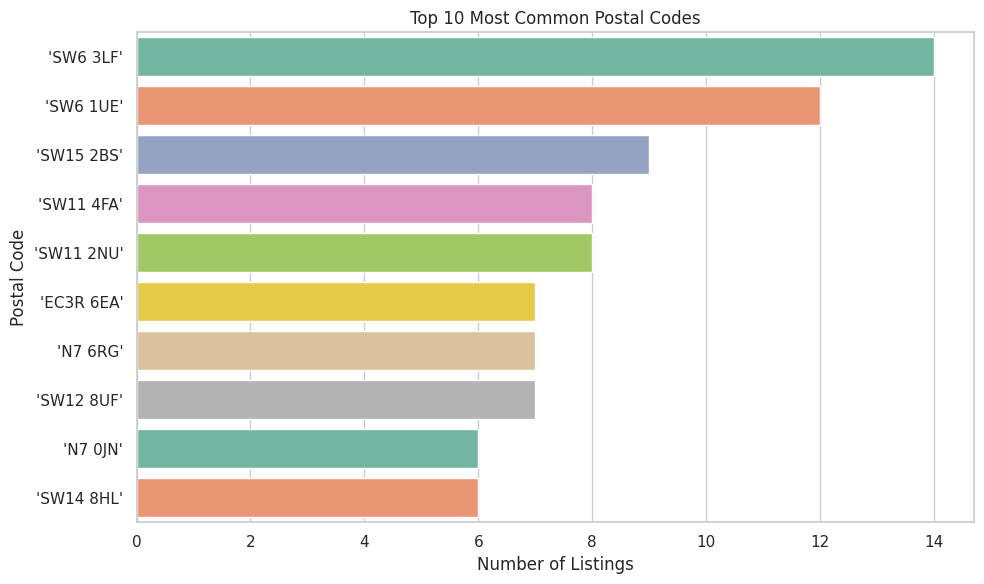

In [ ]:
# Plot 6: Top 10 Most Common Postal Codes
top_postal = df['Postal_Code'].value_counts().nlargest(10)
plt.figure()
sns.barplot(x=top_postal.values, y=top_postal.index, palette='Set2')
plt.title('Top 10 Most Common Postal Codes')
plt.xlabel('Number of Listings')
plt.ylabel('Postal Code')
plt.tight_layout()
plt.show()

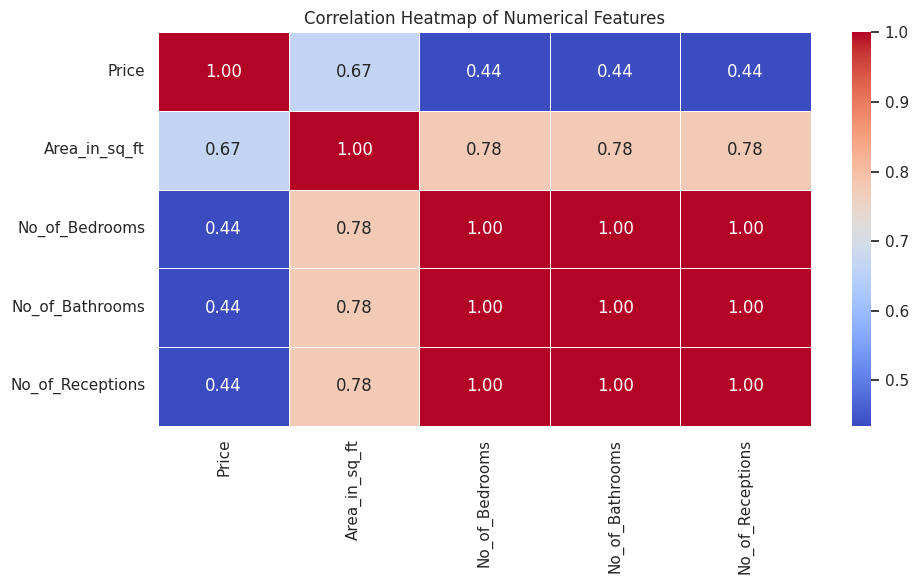

In [ ]:
# Plot 7: Heatmap of Correlation Between Numeric Features
plt.figure()
corr = df.select_dtypes(include='number').corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numerical Features')
plt.tight_layout()
plt.show()

### Feature Engineering

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Convert categorical variables into numerical form using one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)

In [ ]:
# Define features (X) and target (y)
X = df_encoded.drop("Price", axis=1)
y = df_encoded["Price"]

In [ ]:
# Split dataset into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (2778, 5935)
Shape of X_test: (695, 5935)
Shape of y_train: (2778,)
Shape of y_test: (695,)


### MODEL TRAINING

In [ ]:
# Import models
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
# Create and train Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Model Evaluation
y_pred_lr = lr_model.predict(X_test)
accuracy_lr = r2_score(y_test, y_pred_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)

print("Linear Regression Accuracy:", accuracy_lr)
print("Linear Regression MAE:", mae_lr)
print("Linear Regression MSE:", mse_lr)
print("Linear Regression RMSE:", rmse_lr)

Linear Regression Accuracy: 0.5254594645785174
Linear Regression MAE: 681165.3790907958
Linear Regression MSE: 1968604828280.5896
Linear Regression RMSE: 1403069.7873878512


In [ ]:
# Create and train Random Forest model
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [ ]:
# Model Evaluation
y_pred_rf = rf_model.predict(X_test)
accuracy_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)

print("Random Forest Accuracy:", accuracy_rf)
print("Random Forest MAE:", mae_rf)
print("Random Forest MSE:", mse_rf)
print("Random Forest RMSE:", rmse_rf)

Random Forest Accuracy: 0.7302989626487377
Random Forest MAE: 503034.67483281944
Random Forest MSE: 1118839645280.0542
Random Forest RMSE: 1057752.1662847372


In [ ]:
# Create and train XGBoost model
xgb_model = XGBRegressor(random_state=42, n_estimators=100)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [ ]:
# Model Evaluation
y_pred_xgb = xgb_model.predict(X_test)
accuracy_xgb = r2_score(y_test, y_pred_xgb)
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mse_xgb)

print("XGBoost Accuracy:", accuracy_xgb)
print("XGBoost MAE:", mae_xgb)
print("XGBoost MSE:", mse_xgb)
print("XGBoost RMSE:", rmse_xgb)

XGBoost Accuracy: 0.8075717687606812
XGBoost MAE: 478036.34375
XGBoost MSE: 798277632000.0
XGBoost RMSE: 893463.8392235021


In [ ]:
# Create and train Gradient Boosting Regressor model
gbr_model = GradientBoostingRegressor(random_state=42)
gbr_model.fit(X_train, y_train)

GradientBoostingRegressor(random_state=42)

In [ ]:
# Model Evaluation
y_pred_gbr = gbr_model.predict(X_test)
accuracy_gbr = r2_score(y_test, y_pred_gbr)
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
mse_gbr = mean_squared_error(y_test, y_pred_gbr)
rmse_gbr = np.sqrt(mse_gbr)

print("Gradient Boosting Accuracy:", accuracy_gbr)
print("Gradient Boosting MAE:", mae_gbr)
print("Gradient Boosting MSE:", mse_gbr)
print("Gradient Boosting RMSE:", rmse_gbr)

Gradient Boosting Accuracy: 0.7486915108946428
Gradient Boosting MAE: 561694.162693948
Gradient Boosting MSE: 1042539189199.7043
Gradient Boosting RMSE: 1021048.083686417


* CROSS-VALIDATION

In [ ]:
from sklearn.model_selection import cross_val_score

In [ ]:
# Cross-validation for Random Forest
rf_cv_scores = cross_val_score(rf_model, X, y, cv=5, scoring='r2')
print("Random Forest CV R² scores:", rf_cv_scores)
print("Mean CV R²:", np.mean(rf_cv_scores))

Random Forest CV R² scores: [0.68564318 0.66700301 0.55948907 0.75048742 0.58578276]
Mean CV R²: 0.6496810888687959


In [ ]:
# Cross-validation for XGBoost
xgb_cv_scores = cross_val_score(xgb_model, X, y, cv=5, scoring='r2')
print("XGBoost CV R² scores:", xgb_cv_scores)
print("Mean CV R²:", np.mean(xgb_cv_scores))

XGBoost CV R² scores: [0.63304228 0.68034488 0.57252944 0.78368849 0.66219175]
Mean CV R²: 0.6663593649864197


* HYPERPARAMETER TUNING

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# Define parameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5]
}

In [ ]:
# Create GridSearchCV object
grid_rf = GridSearchCV(RandomForestRegressor(random_state=42), param_grid_rf, cv=3, scoring='r2', n_jobs=-1)

In [43]:
# Fit on training data
grid_rf.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5],
                         'n_estimators': [100, 200]},
             scoring='r2')

In [44]:
# Print best parameters and score
print("Best Random Forest Parameters:", grid_rf.best_params_)
print("Best Random Forest CV R²:", grid_rf.best_score_)

Best Random Forest Parameters: {'max_depth': 20, 'min_samples_split': 2, 'n_estimators': 100}
Best Random Forest CV R²: 0.627183321395003


In [45]:
# Get the best tuned model from GridSearchCV
best_rf_model = grid_rf.best_estimator_

In [46]:
# Predict on the test set
y_pred_best_rf = best_rf_model.predict(X_test)

In [47]:
# Evaluate tuned Random Forest model
mae_best_rf = mean_absolute_error(y_test, y_pred_best_rf)
rmse_best_rf = np.sqrt(mean_squared_error(y_test, y_pred_best_rf))
r2_best_rf = r2_score(y_test, y_pred_best_rf)

print("Tuned Random Forest Model Performance:")
print(f" MAE: {mae_best_rf}")
print(f" RMSE: {rmse_best_rf}")
print(f" R²: {r2_best_rf}")

Tuned Random Forest Model Performance:
 MAE: 509598.9881772709
 RMSE: 1044118.2260338162
 R²: 0.7372067997727056


* SHAP INTERPRETATION FOR TUNED RANDOM FOREST

In [48]:
import shap

In [49]:
# Create SHAP explainer for the tuned Random Forest model
explainer = shap.TreeExplainer(best_rf_model)

In [50]:
# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test)

In [51]:
# Initialize JS visualizations for Jupyter notebooks
shap.initjs()

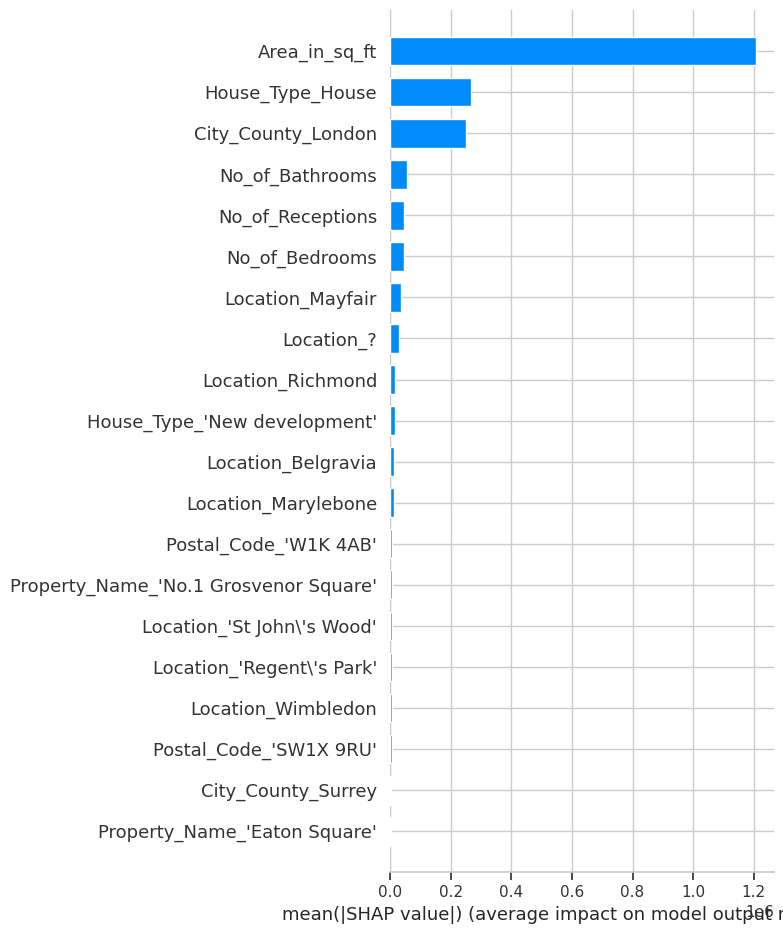

In [52]:
# Plot summary of feature importance (SHAP values)
shap.summary_plot(shap_values, X_test, plot_type="bar")

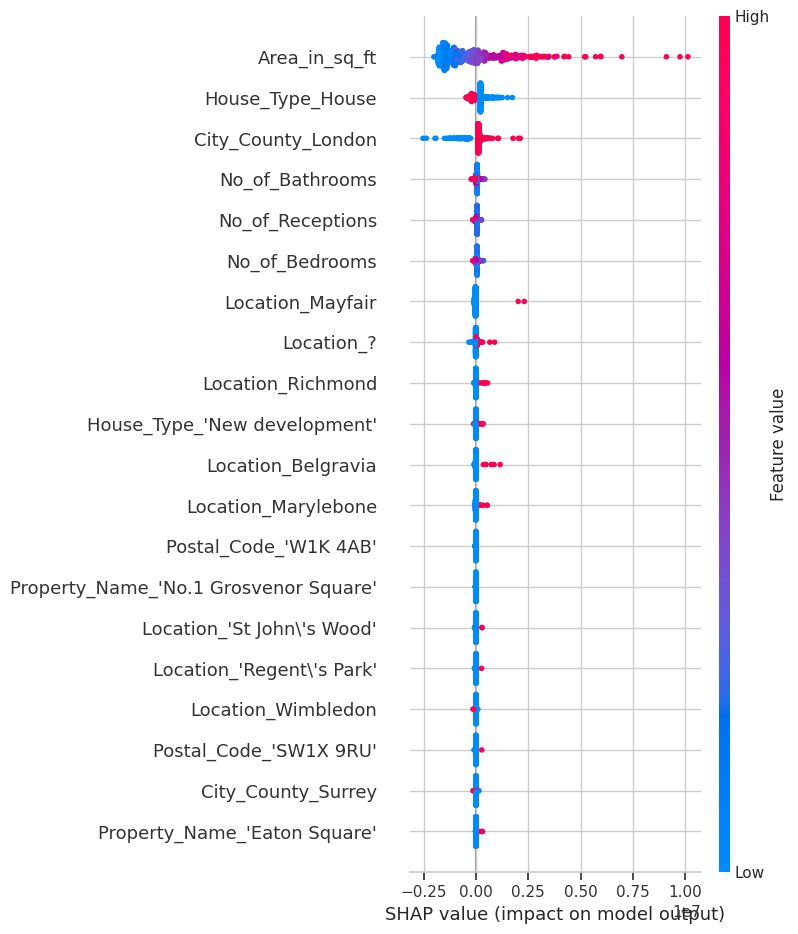

In [53]:
# Detailed SHAP summary plot (distribution of effects per feature)
shap.summary_plot(shap_values, X_test)

In [59]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X_test.iloc[0,:])

### Model Comparision

In [56]:
# Create a dictionary to store model metrics
model_metrics = {
    'Linear Regression': {'R²': accuracy_lr,'MAE': mae_lr,'MSE': mse_lr,'RMSE': rmse_lr},
    'Random Forest': {'R²': accuracy_rf,'MAE': mae_rf,'MSE': mse_rf,'RMSE': rmse_rf},
    'XGBoost': {'R²': accuracy_xgb,'MAE': mae_xgb,'MSE': mse_xgb,'RMSE': rmse_xgb},
    'Gradient Boosting': {'R²': accuracy_gbr,'MAE': mae_gbr,'MSE': mse_gbr,'RMSE': rmse_gbr}
}

# Create a DataFrame from the dictionary
model_comparison_df = pd.DataFrame(model_metrics).T

# Print the comparison DataFrame
print("Model Performance Comparison:")
display(model_comparison_df)

Model Performance Comparison:


,R²,MAE,MSE,RMSE
Linear Regression,0.525459,681165.379091,1.968605e+12,1.403070e+06
Random Forest,0.730299,503034.674833,1.118840e+12,1.057752e+06
XGBoost,0.807572,478036.343750,7.982776e+11,8.934638e+05
Gradient Boosting,0.748692,561694.162694,1.042539e+12,1.021048e+06


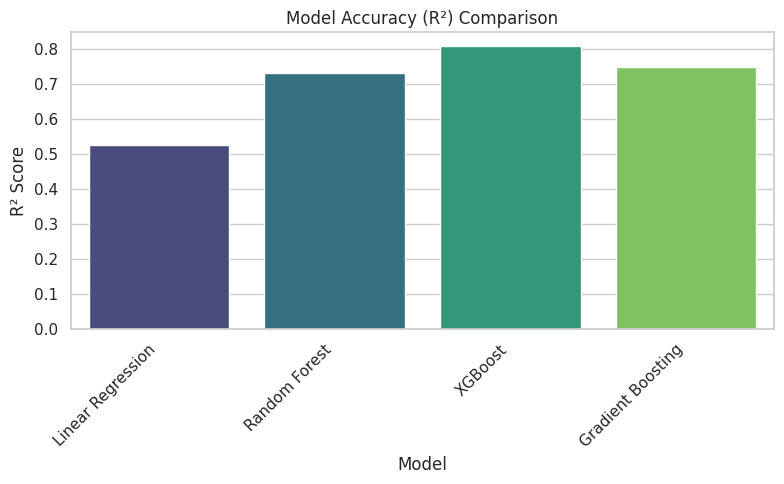

In [58]:
# Plotting the R² (Accuracy) comparison
plt.figure(figsize=(8, 5))
sns.barplot(x=model_comparison_df.index, y=model_comparison_df['R²'], palette='viridis')
plt.title('Model Accuracy (R²) Comparison')
plt.ylabel('R² Score')
plt.xlabel('Model')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()